### Dependencies

In [1]:
from sklearn.preprocessing import normalize
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from pathlib import Path
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
import plotly.express as px
from sklearn.manifold import TSNE

### Data Preparation

In [2]:
# Read in CSV
file = Path('crypto_data.csv')
df = pd.read_csv(file)

In [3]:
# Preview Data
df.sample(10)

,Unnamed: 0,CoinName,Algorithm,IsTrading,ProofType,TotalCoinsMined,TotalCoinSupply
448,MDC,MedicCoin,Scrypt,True,PoW/PoS,NaN,33000000
366,ANTI,Anti Bitcoin,SHA-256,True,PoW,0.000000e+00,42000000
1042,XGS,GenesisX,XEVAN,False,PoS,0.000000e+00,19000000
568,DGMS,Digigems,Scrypt,True,PoW,NaN,50000000
995,HWC,HollyWoodCoin,Scrypt,True,PoS,3.870681e+07,26000000
1134,SCA,SiaClassic,Blake2b,False,PoW,NaN,5000000000
113,IOC,IOCoin,X11,True,PoW/PoS,1.765091e+07,22000000
695,DBIX,DubaiCoin,Dagger-Hashimoto,True,PoW,2.232901e+06,2232901
1165,NEOS,NeosCoin,SHA-256,True,PoS,4.392258e+06,21000000
675,FIND,FindCoin,X13,True,PoS,1.452485e+07,14524851.4827


In [4]:
# Filter DataFrame by currency that is traded
crypto_df = df[df["IsTrading"] == True]
crypto_df.head()

,Unnamed: 0,CoinName,Algorithm,IsTrading,ProofType,TotalCoinsMined,TotalCoinSupply
0,42,42 Coin,Scrypt,True,PoW/PoS,4.199995e+01,42
1,365,365Coin,X11,True,PoW/PoS,NaN,2300000000
2,404,404Coin,Scrypt,True,PoW/PoS,1.055185e+09,532000000
3,611,SixEleven,SHA-256,True,PoW,NaN,611000
4,808,808,SHA-256,True,PoW/PoS,0.000000e+00,0


In [5]:
# Count Null Values by column
crypto_df.isnull().sum(axis=0)

Unnamed: 0           0
CoinName             0
Algorithm            0
IsTrading            0
ProofType            0
TotalCoinsMined    459
TotalCoinSupply      0
dtype: int64

In [6]:
# Remove all rows that have at least one null value
crypto_df = crypto_df.dropna(how="any", axis=0)

In [7]:
# Count Null Values by column
crypto_df.isnull().sum(axis=0)

Unnamed: 0         0
CoinName           0
Algorithm          0
IsTrading          0
ProofType          0
TotalCoinsMined    0
TotalCoinSupply    0
dtype: int64

In [8]:
# Filter for cryptocurrencies that have been mined. That is, the total coins mined should be greater than zero.
crypto_df = df[df["TotalCoinsMined"] > 0]
crypto_df.head()

,Unnamed: 0,CoinName,Algorithm,IsTrading,ProofType,TotalCoinsMined,TotalCoinSupply
0,42,42 Coin,Scrypt,True,PoW/PoS,4.199995e+01,42
2,404,404Coin,Scrypt,True,PoW/PoS,1.055185e+09,532000000
5,1337,EliteCoin,X13,True,PoW/PoS,2.927942e+10,314159265359
7,BTC,Bitcoin,SHA-256,True,PoW,1.792718e+07,21000000
8,ETH,Ethereum,Ethash,True,PoW,1.076842e+08,0


In [9]:
# View Data types
crypto_df.dtypes

Unnamed: 0          object
CoinName            object
Algorithm           object
IsTrading             bool
ProofType           object
TotalCoinsMined    float64
TotalCoinSupply     object
dtype: object

In [10]:
# Usingn algorithm seems to be an interesting basis to use, so we need to see what values are included.
crypto_df["Algorithm"].nunique()

73

In [11]:
# Since the coin names do not contribute to the analysis of the data, delete the `CoinName` and `Unnamed`.
crypto_df = crypto_df.drop("Unnamed: 0", 1)
crypto_df.head()

,CoinName,Algorithm,IsTrading,ProofType,TotalCoinsMined,TotalCoinSupply
0,42 Coin,Scrypt,True,PoW/PoS,4.199995e+01,42
2,404Coin,Scrypt,True,PoW/PoS,1.055185e+09,532000000
5,EliteCoin,X13,True,PoW/PoS,2.927942e+10,314159265359
7,Bitcoin,SHA-256,True,PoW,1.792718e+07,21000000
8,Ethereum,Ethash,True,PoW,1.076842e+08,0


In [12]:
# Drop Coin Name
crypto_df = crypto_df.drop("CoinName", 1)

In [13]:
# Transform Previous IsTrading Column
crypto_df.replace({False: 0, True: 1}, inplace=True)

crypto_df.head()

,Algorithm,IsTrading,ProofType,TotalCoinsMined,TotalCoinSupply
0,Scrypt,1,PoW/PoS,4.199995e+01,42
2,Scrypt,1,PoW/PoS,1.055185e+09,532000000
5,X13,1,PoW/PoS,2.927942e+10,314159265359
7,SHA-256,1,PoW,1.792718e+07,21000000
8,Ethash,1,PoW,1.076842e+08,0


In [14]:
# In order for your dataset to be comprehensible to a machine learning algorithm, its data should be numeric.
crypto_x = pd.get_dummies(data=crypto_df, columns=["Algorithm", "ProofType"])
crypto_x.head()

,IsTrading,TotalCoinsMined,TotalCoinSupply,Algorithm_1GB AES Pattern Search,Algorithm_536,Algorithm_Argon2d,Algorithm_BLAKE256,Algorithm_Blake,Algorithm_Blake2S,Algorithm_Blake2b,...,ProofType_PoW/PoS,ProofType_PoW/PoS,ProofType_PoW/PoW,ProofType_PoW/nPoS,ProofType_Pos,ProofType_Proof of Authority,ProofType_Proof of Trust,ProofType_TPoS,ProofType_Zero-Knowledge Proof,ProofType_dPoW/PoW
0,1,4.199995e+01,42,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
2,1,1.055185e+09,532000000,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
5,1,2.927942e+10,314159265359,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
7,1,1.792718e+07,21000000,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,1,1.076842e+08,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [15]:
# Convert the remaining features with text values, `Algorithm` and `ProofType`, into numerical data.
scaler = StandardScaler()
crypto_scaled = scaler.fit_transform(crypto_x)

In [16]:
# Check that the data was scaled
crypto_scaled[0]

array([ 0.29083753, -0.11450078, -0.15072489, -0.04166667, -0.04166667,
       -0.04166667, -0.05897678, -0.0934947 , -0.04166667, -0.05897678,
       -0.05897678, -0.04166667, -0.04166667, -0.18949048, -0.05897678,
       -0.0934947 , -0.04166667, -0.11081833, -0.0722944 , -0.04166667,
       -0.04166667, -0.1518211 , -0.04166667, -0.13280318, -0.04166667,
       -0.04166667, -0.0835512 , -0.05897678, -0.04166667, -0.04166667,
       -0.04166667, -0.05897678, -0.04166667, -0.0835512 , -0.0934947 ,
       -0.10250796, -0.04166667, -0.1258772 , -0.13280318, -0.1518211 ,
       -0.04166667, -0.0835512 , -0.04166667, -0.04166667, -0.0722944 ,
       -0.17423301, -0.04166667, -0.04166667, -0.04166667, -0.0722944 ,
       -0.16888013, -0.30802055, -0.04166667, -0.0934947 , -0.0934947 ,
       -0.05897678,  1.39963365, -0.04166667, -0.04166667, -0.04166667,
       -0.0835512 , -0.04166667, -0.04166667, -0.04166667, -0.04166667,
       -0.04166667, -0.05897678, -0.04166667, -0.04166667, -0.39

### Dimensionality Reduction

In [17]:
# Preserve 90% of the explained variance in dimensionality reduction
pca = PCA(n_components=0.90)
pca_transformed_data = pca.fit_transform(crypto_scaled)

In [18]:
# Further reduce the dataset dimensions with t-SNE and visually inspect the results
tsne = TSNE(learning_rate=100)
transformed_features = tsne.fit_transform(pca_transformed_data)

In [19]:
# The sum of the explained variance of the principal components
pca.explained_variance_.sum()

92.81861900542566

In [20]:
# Preserve 99% of the explained variance in dimensionality reduction
pca = PCA(n_components=0.99)
pca_transformed_data = pca.fit_transform(crypto_scaled)

In [21]:
# Further reduce the dataset dimensions with t-SNE and visually inspect the results
tsne = TSNE(learning_rate=100)
transformed_features = tsne.fit_transform(pca_transformed_data)

In [22]:
# The sum of the explained variance of the principal components
pca.explained_variance_.sum()

101.33922305417208

#### Preserving approximately 99% of the explained variance made a significant difference.

<function matplotlib.pyplot.show(close=None, block=None)>

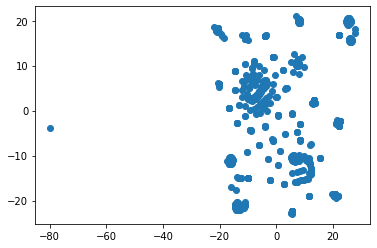

In [23]:
# Then create a scatter plot of the t-SNE output.
x = transformed_features[:,0]
y = transformed_features[:,1]

plt.scatter(x,y)
plt.show

### Cluster Analysis with k-Means

In [24]:
# Initializing model with K = 3 (since we already know there are three classes of iris plants)
model = KMeans(n_clusters=3, random_state=5)

In [25]:
inertia = []
k = list(range(1, 10))

# Calculate the inertia for the range of k values
for i in k:
    km = KMeans(n_clusters=i, random_state=0)
    km.fit(crypto_scaled)
    inertia.append(km.inertia_)

# Create the Elbow Curve using hvPlot
elbow_data = {"k": k, "inertia": inertia}
df_elbow = pd.DataFrame(elbow_data)
df_elbow.head()

,k,inertia
0,1,58854.000000
1,2,57477.996300
2,3,56321.129489
3,4,55623.220340
4,5,54695.340504


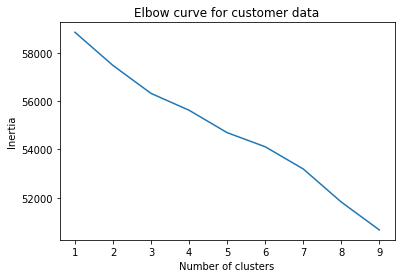

In [26]:
# Plot the elbow curve to find the best candidate(s) for k
plt.plot(df_elbow['k'], df_elbow['inertia'])
plt.xticks(range(1,10))
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.title('Elbow curve for customer data')
plt.show()

### Recommendation

#### The cryptocurrencies can not be clustered together as the elbow curve fails the classification of this dataset.